In [1]:
import networkx as nx
import numpy as np
from ei_net import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
##########################################
############ PLOTTING SETUP ##############
EI_cmap = "Greys"
where_to_save_pngs = "../figs/pngs/"
where_to_save_pdfs = "../figs/pdfs/"
save = True
plt.rc('axes', axisbelow=True)
##########################################
##########################################

# Uncertainty and causal emergence in complex networks

# Chapter 02: Network Size and Effective Information

## Random Networks
We first examined the effective information of networks with different sizes and structures, asking basic questions about the relationship between a network's $EI$ to its size, number of edges, and network structure. These inquiries eventually allow for the exhaustive classification and quantification of different causal structures. For simplicity and generality, we start by examining the $EI$ in undirected networks.

It is perhaps intuitive that the $EI$ of a network will increase as the network grows in size. The upper bound of $EI$ in a network of $N$ nodes is log$_2(N)$, and adding more nodes should also increase the available repertoire of counterfactuals or states, which should in turn increase the informativeness of the causal structure. While we describe multiple classes of networks where $EI$ grows as a function of network size, this is not always so.

Here, we show a comparison between the number of nodes in a network and that network's $EI$, using two canonical network structures---Erdös-Rényi (ER) random graphs (Erdös & Rényi, 1959; Bollobas, 1984) and Barabási-Albert (BA) networks (Barabasi & Albert, 1999). As both classes of networks grow in size, the BA networks continue increasing in $EI$. Interestingly, the $EI$ in ER networks converges to a value of $-\text{log}_2(p)$, where $p$ is the probability that any two nodes in the network will be connected
____________________________________________________________________________

## Upper and Lower Limits to Effective Information in Networks
The fixed information in random causal structures is fundamental to the notion of causal structures as networks. After a certain point, a causal structure that is grown randomly does not gain information as its size increase. Its $EI$ is dominated solely by the probability that any two nodes will be connected, $p$, such that the $EI$ of a random network will be $-\text{log}_2(p)$. This is not the case in Barabási-Albert (BA) networks. Such a key difference suggests there is something intrinsic to the topology of an organized network where each new node contributes to minimizing uncertainty. That is, $EI$ increases as a function of $N$ if it was created under rules which evince structure (like a BA network), whereas for a network with a random topology it does not.

Here, we will see an important relationship between the $EI$ and a network's density. Sparse, connected networks offer the most certainty about cause and effects and therefore will likely have higher $EI$. As the network becomes more dense, however, we see that the $EI$ drops off. This shift occurs in ER networks at approximately $\langle k \rangle = \text{log}_2(N)$, which is also the point at which we can expect all nodes to be in a giant component (Barabási, 2016). Importantly, if the network is maximally dense (i.e. a fully connected network, with self-loops), $EI=0.00$. However, we expect such dense low-$EI$ structures to not be common, since network structures found in nature and society tend to be sparse (Del Genio, Gross, & Bassler, 2011).

To see the clear relationship between network connectivity and $EI$, compare the $EI$ of $d$-dimensional ring-lattices to that of hub-and-spoke star networks. The two form striking bounds, between which we expect most real networks to fall. That is, for undirected networks, the 1-dimensional ring lattice represents the upper bound where $\langle k \rangle = 2.00$, and the $EI$ scales with $\text{log}_{2}(N) - \text{log}_{2}(2d)$. $N$ is the number of nodes and $d$ is the dimension of the ring-lattice (i.e., $d=1$ is a cycle and is shown in this notebook, $d=2$ is a taurus, etc.). On the opposite end of the spectrum, an all-to-all undirected network have zero $EI$. Comparatively, as the size of star networks increase, their $EI$ approaches 0.00. 

The picture that begins to emerge is that $EI$ is inextricably linked to the pattern of connectivity and therefore the motifs present in the network. In the following section, we explore the $EI$ of three-node directed network motifs in order to understand further why certain structures offer different amounts of information about causes and effects in a system. This also allows us to understand exactly why $EI$ is an appropriate metric of causation.

## 2.1 Comparing Erdős-Rényi and Barabási-Albert networks

In [3]:
import datetime as dt

In [4]:
Nmax = 2000
Nmin = 10
Nval = 16
n_sim = 4

ms = [2, 7]
ps = [0.01, 0.04] 
network_sizes = np.linspace(Nmin, Nmax, Nval, dtype=int)

In [5]:
ei_er = []
ei_ba = []

startT = dt.datetime.now()
for i in range(len(ms)):
    nownow = dt.datetime.now().strftime('%H:%M:%S.%f')[:-5]
    print("Starting m=%i at %s"%(ms[i],nownow))
    ei_er_temp = []
    ei_ba_temp = []
    for Ni in range(len(network_sizes)):
        N = network_sizes[Ni]
        if Ni % 5 == 0:
            nownow = dt.datetime.now().strftime('%H:%M:%S.%f')[:-5]
            print("\tN=%04i at %s"%(N,nownow))
    
        temp_ba = 0
        temp_er = 0
        for num_sim in range(n_sim):
            Gba = nx.barabasi_albert_graph(N, ms[i])
            Ger = nx.erdos_renyi_graph(N, ps[i])
            temp_ba += effective_information(Gba)
            temp_er += effective_information(Ger)
        
        ei_er_temp.append(temp_er/n_sim)
        ei_ba_temp.append(temp_ba/n_sim)

    ei_er.append(ei_er_temp)
    ei_ba.append(ei_ba_temp)

finisH = dt.datetime.now()
diff   = finisH-startT
diff   = diff.total_seconds()

print("\nTotal simulation time: %.2f seconds"%diff)

Starting m=2 at 18:46:33.3
	N=0010 at 18:46:33.3
	N=0673 at 18:46:34.2
	N=1336 at 18:46:38.7
	N=2000 at 18:46:49.0
Starting m=7 at 18:46:52.0
	N=0010 at 18:46:52.0
	N=0673 at 18:46:53.8
	N=1336 at 18:47:03.6
	N=2000 at 18:47:31.2

Total simulation time: 65.84 seconds


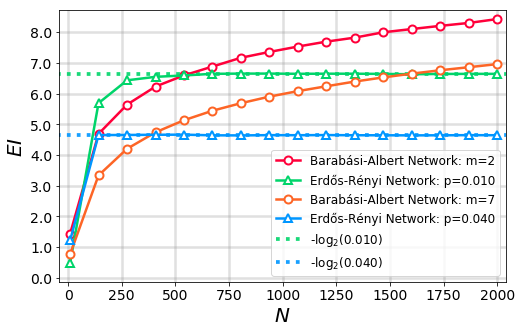

In [6]:
maxy_ba = max([max(ei_ba[0]),max(ei_ba[1])])
maxy_er = max([max(ei_er[0]),max(ei_er[1])])
maxy = max(maxy_ba,maxy_er)
m_size = 8
lw = 2.5
mew = 2
ba_col = ["#ff003a","#fd6526"]
er_col = ["#00d46a","#0096ff"]


fig, ax0 = plt.subplots(1,1,figsize=(8,5))

for i in range(len(ms)):
    ax0.plot(
        network_sizes, ei_ba[i], marker='o', markersize=m_size, 
        color=ba_col[i], markerfacecolor='w', markeredgewidth=mew, 
        linewidth=lw, label="Barabási-Albert Network: m=%s"%ms[i])
    ax0.plot(
        network_sizes, ei_er[i], marker='^', markersize=m_size, 
        color=er_col[i], markerfacecolor='w', markeredgewidth=mew, 
        linewidth=lw, label="Erdős-Rényi Network: p=%.3f"%ps[i])
    ax0.hlines(
        -np.log2(ps[i]), -100, max(network_sizes)+100, 
        linestyles=':', color=er_col[i], alpha=0.9,
        linewidth=lw*1.5, label=r"-log$_2$(%.3f)"%ps[i])

ax0.set_xlabel("$N$", size=20)
ax0.set_ylabel("$EI$", size=20)

ax0.set_xticks(np.linspace(0,Nmax,9))
ax0.set_xticklabels(
    ["%i"%i for i in np.linspace(0,Nmax,9)], fontsize=14)

ax0.set_yticks(np.linspace(0,int(maxy),9))
ax0.set_yticklabels(
    ["%.1f"%i for i in np.linspace(0,int(maxy),9)], fontsize=14)

ax0.set_ylim(-0.015*maxy, maxy*1.035)
ax0.set_xlim(-0.02*Nmax, Nmax*1.02)
ax0.grid(linestyle='-', color='#999999', linewidth=lw, alpha=0.3)
ax0.legend(fontsize=12)

if save:
    plt.savefig("../figs/pngs/EI_compareERBA.png", dpi=425, bbox_inches='tight')
    plt.savefig("../figs/pdfs/EI_compareERBA.pdf", bbox_inches='tight')
plt.show()

## 2.2 Comparing different Erdős-Rényi networks

In [7]:
Nval = 40
pmin = 1e-8
pmax = 1e0

Nmax = 2000
Nmin = 10

p_values = np.logspace(np.log10(pmin), np.log10(pmax), Nval)
network_sizes = np.linspace(Nmin, Nmax, Nval, dtype=int)

n_sim = 2
ei_dict = {}

startT = dt.datetime.now()
for Ni, N in enumerate(network_sizes):
    if Ni % 2 == 0:
        nownow = dt.datetime.now().strftime('%H:%M:%S.%f')[:-5]
        print("Starting N=%04i at %s"%(N,nownow))
    ei_er_p = []
    for pi, p in enumerate(p_values):
        
        temp = 0
        for num_sim in range(n_sim):
            Ger = nx.erdos_renyi_graph(N, p)
            temp += effective_information(Ger)

        ei_er_p.append(temp/n_sim)
    ei_dict[N] = ei_er_p
    
finisH = dt.datetime.now()
diff   = finisH-startT
diff   = diff.total_seconds()

print("\nTotal simulation time: %.2f seconds"%diff)

Starting N=0010 at 18:47:42.5
Starting N=0112 at 18:47:42.8
Starting N=0214 at 18:47:45.2
Starting N=0316 at 18:47:51.6
Starting N=0418 at 18:48:03.5
Starting N=0520 at 18:48:22.7
Starting N=0622 at 18:48:52.2
Starting N=0724 at 18:49:32.4
Starting N=0826 at 18:50:25.9
Starting N=0928 at 18:51:34.1
Starting N=1030 at 18:52:59.8
Starting N=1132 at 18:54:48.7
Starting N=1234 at 18:57:02.1
Starting N=1336 at 18:59:36.0
Starting N=1438 at 19:02:35.7
Starting N=1540 at 19:06:03.1
Starting N=1642 at 19:10:00.6
Starting N=1744 at 19:14:30.1
Starting N=1846 at 19:19:35.6
Starting N=1948 at 19:25:15.7

Total simulation time: 2637.87 seconds


In [8]:
max_ei = max([max(p) for p in list(ei_dict.values())])-0.05
min_ei = 0
ei_range = np.linspace(min_ei, max_ei, len(p_values))

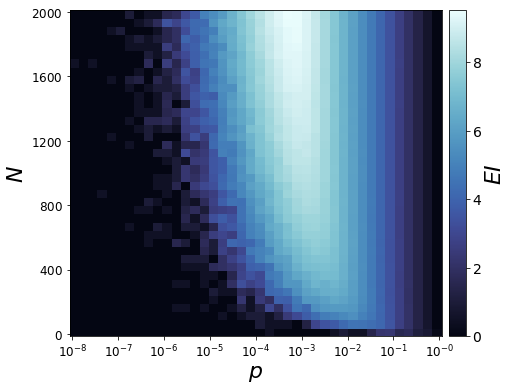

In [9]:
# import cmocean as cmo
# col_map = cmo.cm.ice
col_map = plt.cm.viridis
save = True
EIs = np.array([ei_n for ei_n in ei_dict.values()])
xtixlab = [r'$10^{-%i}$'%i for i in np.linspace(8, 0, 9, dtype=int)]
xtix = np.linspace(0.25,EIs.shape[1]-0.25,9)
ytixlab = [r"$%i$"%i for i in np.linspace(0, Nmax, 6)]
ytix = np.linspace(0.25,EIs.shape[0]-0.25,6)

fig,ax0 = plt.subplots(1,1,figsize=(8,6))

ax0.pcolor(EIs, cmap=col_map)
ax0.set_ylabel(r"$N$", size=22)
ax0.set_xlabel(r"$p$", size=22)
ax0.set_yticks(ytix)
ax0.set_yticklabels(ytixlab, fontsize=12)
ax0.set_xticks(xtix)
ax0.set_xticklabels(xtixlab, fontsize=12)

m = plt.cm.ScalarMappable(cmap=col_map)
m.set_array(ei_range)
cbar = plt.colorbar(m, pad=0.017)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label("$EI$", size=22)

if save:
    plt.savefig(where_to_save_pngs+"EI_ER_NvsP.png", bbox_inches='tight', dpi=425)
    plt.savefig(where_to_save_pdfs+"EI_ER_NvsP.pdf", bbox_inches='tight')

plt.show()

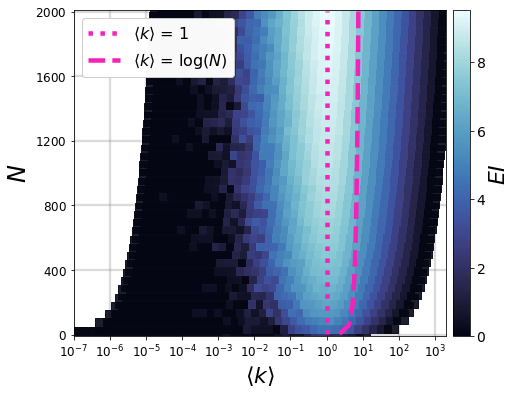

In [10]:
ei_dict_k = {"N":[],"k":[],"EI":[]}
for ni,N in enumerate(network_sizes):
    for pi,p in enumerate(p_values):
        ei_dict_k['k'].append(p*N)
        ei_dict_k['N'].append(N)
        ei_dict_k['EI'].append(ei_dict[N][pi])

xtix = np.logspace(-7,3,11)
xtixlab = [r'$10^{%i}$'%i for i in np.linspace(-7,3,11,dtype=int)]
ytix = np.linspace(5, Nmax-5, 6)
ytixlab = [r"$%i$"%i for i in np.linspace(0, Nmax, 6)]

fig, ax = plt.subplots(1,1,figsize=(8,6))

m = plt.cm.ScalarMappable(cmap=col_map)

colors = col_map(np.array(ei_dict_k['EI'])/max(ei_dict_k['EI']))
ax.scatter(ei_dict_k['k'], ei_dict_k['N'], s=200, alpha=0.9, marker="s", c=colors)
ax.set_xscale('log')
ax.set_xlim(1e-5,1e4)

# plt.plot(np.log2(network_sizes), network_sizes, linewidth=5.5, linestyle='--', color='#ff723b', 
#            label=r"$\langle k \rangle$ = $\log_2(N)$", zorder=5)
plt.plot([1]*len(network_sizes), network_sizes, linewidth=4.5, linestyle=':', color='#f422b8', 
           label=r"$\langle k \rangle$ = $1$")#, zorder=5)
plt.plot(np.log(network_sizes), network_sizes, linewidth=4.5, linestyle='--', color='#f422b8', 
           label=r"$\langle k \rangle$ = $\log(N)$")#, zorder=5)

ax.set_ylabel(r"$N$", size=24)
ax.set_xlabel(r"$\langle k \rangle$", size=22)
ax.set_yticks(ytix)
ax.set_yticklabels(ytixlab, fontsize=12)
ax.set_xticks(xtix)
ax.set_xticklabels(xtixlab, fontsize=12)

m = plt.cm.ScalarMappable(cmap=col_map)
m.set_array(ei_range)
cbar = plt.colorbar(m, pad=0.017)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label("$EI$", size=22)

ax.grid(True, linestyle='-', linewidth=2.3, alpha=0.35, color='#999999')

plt.xlim(min(p_values)*min(network_sizes),max(p_values)*max(network_sizes))
plt.ylim(-5, max(network_sizes)+5)
plt.legend(fontsize=16, loc=2, framealpha=0.98)

if save:
    plt.savefig(where_to_save_pngs+"EI_ER_NvsK.png", bbox_inches='tight', dpi=425)
    plt.savefig(where_to_save_pdfs+"EI_ER_NvsK.pdf", bbox_inches='tight')

plt.show()

_______________________

## 2.3 Comparing star networks to ring lattice networks

In [11]:
ei_star = []
ei_line = []
net_size = []
network_sizes = np.array(sorted(list(set(np.logspace(0,3.5,25,dtype=int)))))
line_dict = {}
star_dict = {}

for N in network_sizes:
    G_star = nx.star_graph(N+1) 
    G_line = nx.watts_strogatz_graph(N+2, 2, 0)
    ei_star.append(effective_information(G_star))
    ei_line.append(effective_information(G_line))
    net_size.append(N+2)
    star_dict[N+2] = effective_information(G_star)
    line_dict[N+2] = effective_information(G_line)

In [12]:
star_x = list(star_dict.keys())
star_y = list(star_dict.values())
line_x = list(line_dict.keys())
line_y = list(line_dict.values())

In [13]:
import matplotlib.patches as mpatches

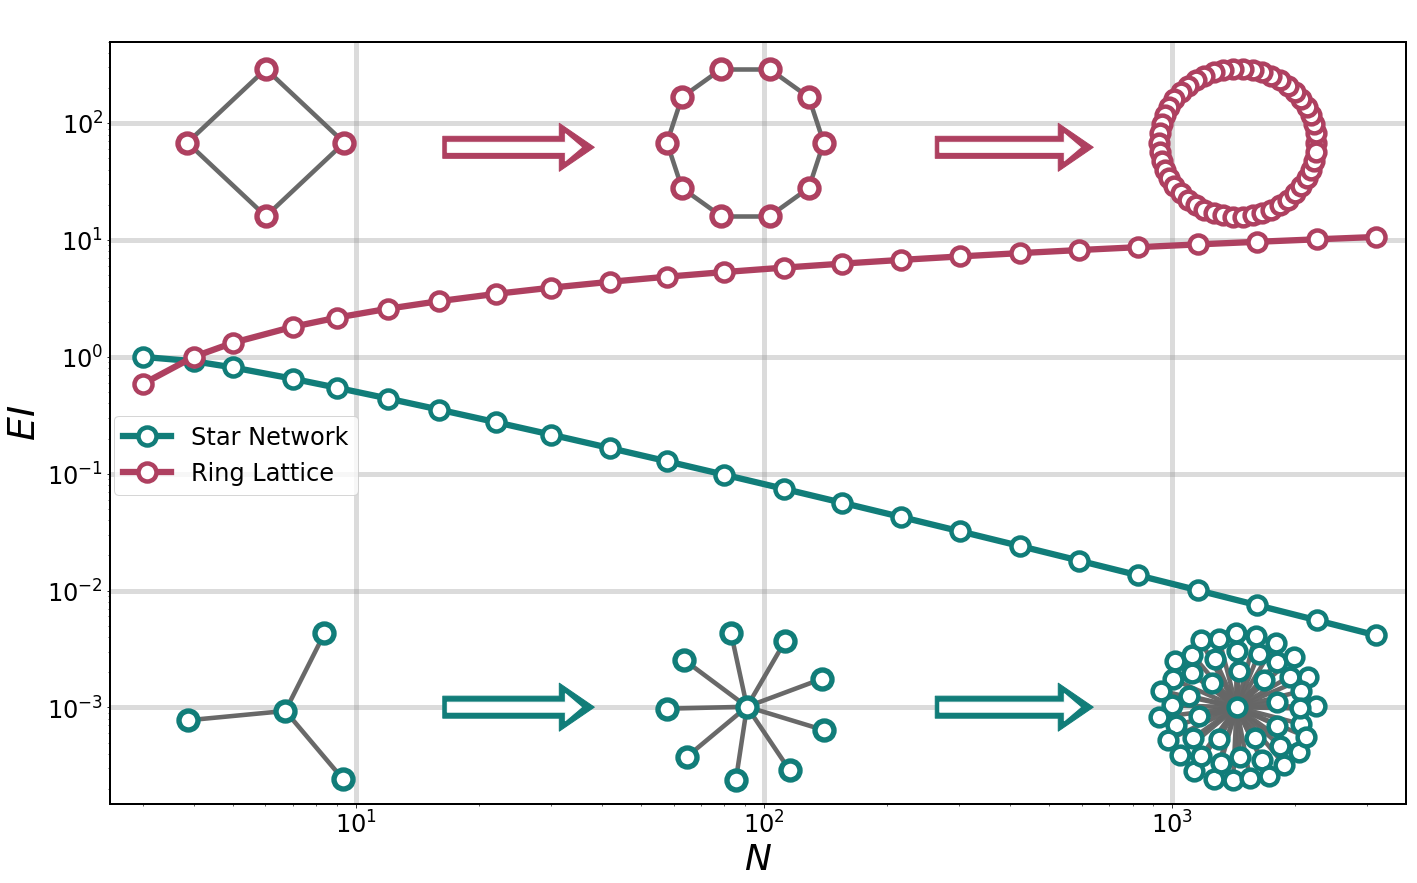

In [14]:
plt.rc('axes', linewidth=2)
plt.rc('axes', axisbelow=True)
col1 = np.array([0.06581203, 0.49116525, 0.47591044, 1.0])
col2 = np.array([0.68306918, 0.25012518, 0.37634705, 1.0])

mult=0.9
fig, ax = plt.subplots(figsize=(20*mult,12*mult))

plt.loglog(star_x, star_y, marker='o', markersize=20*mult, markerfacecolor='w', 
           color=col1, markeredgewidth=5*mult, linewidth=7.0*mult, label="Star Network")
plt.loglog(line_x, line_y, marker='o', markersize=20*mult, markerfacecolor='w', 
           color=col2, markeredgewidth=5*mult, linewidth=7.0*mult, label="Ring Lattice")

plt.grid(linestyle='-', linewidth=5.0, color='#999999', alpha=0.35)
plt.xlabel("$N$", size=36)
plt.ylabel("$EI$", size=38)
plt.xticks(size=24)
plt.yticks(size=24)
plt.legend(fontsize=24, bbox_to_anchor=[0.2, 0.525])
plt.xlim((2.5, 3750))
plt.ylim((1.5e-4, 5e2))

###############
plt.axes([0.05, 0.75, 0.14, 0.22])
G = nx.watts_strogatz_graph(4, 2, 0.0)
plt.axis('off')
pos11 = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos11, node_color='white', node_size=400*mult, linewidths=6*mult).set_edgecolor(col2)
nx.draw_networkx_edges(G, pos11, edge_color="#666666", width=4.55, alpha=0.98)

plt.axes([0.42, 0.75, 0.14, 0.22])
G = nx.nx.watts_strogatz_graph(10, 2, 0.0)
plt.axis('off')
pos12 = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos12, node_color='white', node_size=400*mult, linewidths=6*mult).set_edgecolor(col2)
nx.draw_networkx_edges(G, pos12, edge_color="#666666", width=4.55, alpha=0.98)

plt.axes([0.8, 0.75, 0.14, 0.22])
G = nx.watts_strogatz_graph(50, 2, 0.0)
plt.axis('off')
pos13 = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos13, node_color='white', node_size=350*mult, linewidths=5*mult).set_edgecolor(col2)
nx.draw_networkx_edges(G, pos13, edge_color="#666666", width=4.55, alpha=0.98)

###############
plt.axes([-0.06, 0.81, 0.5, 0.22])
plt.axis('off')
style="Simple,head_length=35,head_width=48,tail_width=22"
arrow11 = arrow11 = mpatches.FancyArrowPatch((0.63,0.2), (0.870,0.2), arrowstyle=style, color=col2)
plt.gca().add_patch(arrow11)
style="Simple,head_length=16,head_width=27,tail_width=10"
arrow12 = arrow12 = mpatches.FancyArrowPatch((0.637,0.2), (0.850,0.2), arrowstyle=style, color ='w')
plt.gca().add_patch(arrow12)

plt.axes([0.26, 0.81, 0.5, 0.22])
plt.axis('off')
style="Simple,head_length=35,head_width=48,tail_width=22"
arrow21 = arrow21 = mpatches.FancyArrowPatch((0.75,0.2), (1.0,0.2), arrowstyle=style, color=col2)
plt.gca().add_patch(arrow21)
style="Simple,head_length=16,head_width=27,tail_width=10"
arrow22 = arrow22 = mpatches.FancyArrowPatch((0.757,0.2), (0.980,0.2), arrowstyle=style, color ='w')
plt.gca().add_patch(arrow22)
###############

plt.axes([0.05, 0.025, 0.14, 0.22])
G = nx.star_graph(3)
plt.axis('off')
pos21 = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos21, node_color='white', node_size=400*mult, linewidths=6*mult).set_edgecolor(col1)
nx.draw_networkx_edges(G, pos21, edge_color="#666666", width=4.55, alpha=0.98)

plt.axes([0.42, 0.025, 0.14, 0.22])
G = nx.star_graph(9)
plt.axis('off')
pos22 = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos22, node_color='white', node_size=400*mult, linewidths=6*mult).set_edgecolor(col1)
nx.draw_networkx_edges(G, pos22, edge_color="#666666", width=4.55, alpha=0.98)

plt.axes([0.8, 0.025, 0.14, 0.22])
G = nx.star_graph(49)
plt.axis('off')
pos23 = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos23, node_color='white', node_size=350*mult, linewidths=5*mult).set_edgecolor(col1)
nx.draw_networkx_edges(G, pos23, edge_color="#666666", width=4.55, alpha=0.98)

###############
plt.axes([-0.06, 0.09, 0.5, 0.22])
plt.axis('off')
style="Simple,head_length=35,head_width=48,tail_width=22"
arrow11 = arrow11 = mpatches.FancyArrowPatch((0.63,0.2), (0.870,0.2), arrowstyle=style, color=col1)
plt.gca().add_patch(arrow11)
style="Simple,head_length=16,head_width=27,tail_width=10"
arrow12 = arrow12 = mpatches.FancyArrowPatch((0.637,0.2), (0.850,0.2), arrowstyle=style, color ='w')
plt.gca().add_patch(arrow12)

plt.axes([0.26, 0.09, 0.5, 0.22])
plt.axis('off')
style="Simple,head_length=35,head_width=48,tail_width=22"
arrow21 = arrow21 = mpatches.FancyArrowPatch((0.75,0.2), (1.0,0.2), arrowstyle=style, color=col1)
plt.gca().add_patch(arrow21)
style="Simple,head_length=16,head_width=27,tail_width=10"
arrow22 = arrow22 = mpatches.FancyArrowPatch((0.757,0.2), (0.980,0.2), arrowstyle=style, color ='w')
plt.gca().add_patch(arrow22)

plt.subplots_adjust(top=0.99, bottom=0.01, right=1, left=0, hspace=0, wspace=0)

if save:
    plt.savefig(where_to_save_pngs+"EffectiveInformation_Compare_StarLine.png", bbox_inches='tight', dpi=425)
    plt.savefig(where_to_save_pdfs+"EffectiveInformation_Compare_StarLine.pdf", bbox_inches='tight')

plt.show()
plt.rc('axes', linewidth=1)

As the number of nodes in star networks increases, we observe an $EI$ that approaches zero, while the $EI$ of ring lattice networks grows logarithmically as the number of nodes increases.

________________

## 2.4 Comparing preferential attachment networks by varying their $\alpha$ values

In [16]:
def preferential_attachment_network(N, alpha=1.0, m=1):
    """
    Generates a network based off of a preferential attachment 
    growth rule. Under this growth rule, new nodes place their 
    $m$ edges to nodes already present in the graph, G, with 
    a probability proportional to $k^\alpha$.
    
    Params
    ------
    N (int): the desired number of nodes in the final network
    alpha (float): the exponent of preferential attachment. 
                   When alpha is less than 1.0, we describe it
                   as sublinear preferential attachment. At
                   alpha > 1.0, it is superlinear preferential
                   attachment. And at alpha=1.0, the network 
                   was grown under linear preferential attachment,
                   as in the case of Barabasi-Albert networks.
    m (int): the number of new links that each new node joins
             the network with.
             
    Returns
    -------
    G (nx.Graph): a graph grown under preferential attachment.
    
    """
    G = nx.Graph()
    G = nx.complete_graph(m+1)

    for node_i in range(m+1,N):
        degrees = np.array(list(dict(G.degree()).values()))
        probs = (degrees**alpha) / sum(degrees**alpha)
        eijs = np.random.choice(
            G.number_of_nodes(), size=(m,), replace=False, p=probs)
        for node_j in eijs:
            G.add_edge(node_i, node_j)

    return G

In [57]:
Nmax = 2500
Nmin = 10
Nval = 20

network_sizes = np.logspace(np.log10(Nmin), np.log10(Nmax), Nval, dtype=int)
alphas = np.array([0.0, 0.5, 1.0, 1.2, 1.3, 1.4, 1.5, 2.0, 2.5])

n_sim = 80

In [268]:
import datetime as dt

In [305]:
N = 2500
nsamps = 20
n_sim = 80
network_sizes = np.logspace(1, np.log10(N), nsamps, dtype=int)
alphas = np.array([0.0, 0.5, 1.0, 1.2, 1.3, 1.4, 1.5, 2.0, 2.5])

In [306]:
ms = [1]
out_dict = {}

for alpha in alphas:
    print("Starting iteration alpha = %.1f at %s"%(alpha,dt.datetime.now()))
    alpha_temp = {}
    for m in ms:
        m_temp = []
        for N in network_sizes:
            N_temp = []
            for num_sim in range(n_sim):
                G = preferential_attachment_network(N, alpha, m)

                N_temp.append(effective_information(G))
            m_temp.append(N_temp)

        alpha_temp[m] = m_temp
        
    out_dict[alpha] = alpha_temp

Starting iteration alpha = 0.0 at 2019-05-20 13:37:48.235958
Starting iteration alpha = 0.5 at 2019-05-20 13:44:00.374389
Starting iteration alpha = 1.0 at 2019-05-20 13:50:16.400084
Starting iteration alpha = 1.2 at 2019-05-20 13:56:43.478900
Starting iteration alpha = 1.3 at 2019-05-20 14:02:58.968516
Starting iteration alpha = 1.4 at 2019-05-20 14:08:47.275276
Starting iteration alpha = 1.5 at 2019-05-20 14:14:57.554698
Starting iteration alpha = 2.0 at 2019-05-20 14:20:58.575863
Starting iteration alpha = 2.5 at 2019-05-20 14:27:05.173995


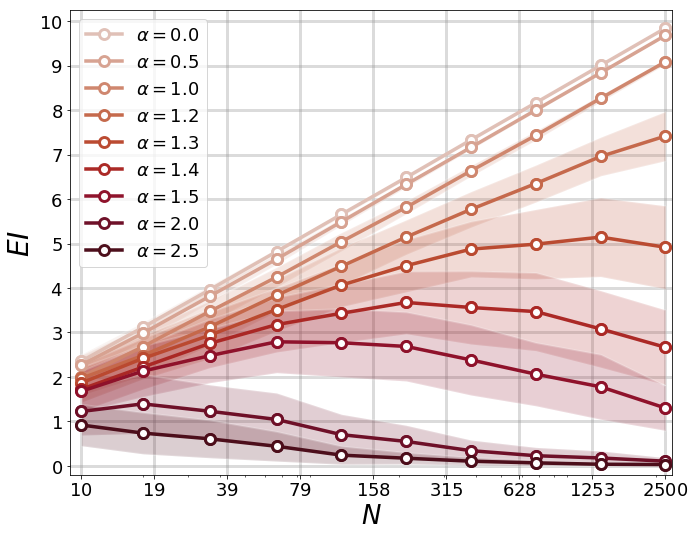

In [337]:
mult=0.9
plt.figure(figsize = (12*mult,9.5*mult))
m_shapes = dict(zip(ms,['o','^','s','+']))

# alpha_colors = cmo.cm.amp(np.linspace(0.15,0.95,len(alphas)))
alpha_colors = plt.cm.viridis(np.linspace(0.15,0.95,len(alphas)))
alpha_colors = dict(zip(alphas, alpha_colors))

labs = ['- Random Tree', '', '- Barabási-Albert', '', '', '', '', '', '- Star-like Tree']

maxEI=0
minEI=1
counter = 0
for alpha in alphas:
    for m in ms:
        data = out_dict[alpha]
        EI_N_list = np.mean(out_dict[alpha][m],axis=1)
        if max(EI_N_list) > maxEI:
            maxEI = max(EI_N_list)
        if min(EI_N_list) < minEI:
            minEI = min(EI_N_list)
        m_temp_stdv = np.std(out_dict[alpha][m],axis=1)
        fillb = EI_N_list-m_temp_stdv
        fillb[fillb<0] = 0

        sizes = np.array([(network_sizes[i]+network_sizes[i+1])/2 for i in range(0,len(network_sizes)-1,2)])
        means = np.array([(EI_N_list[i]+EI_N_list[i+1])/2 for i in range(0,len(EI_N_list)-1,2)])
        stdvs = np.array([(m_temp_stdv[i]+m_temp_stdv[i+1])/2 for i in range(0,len(m_temp_stdv)-1,2)])        
        
        plt.fill_between(sizes, means-stdvs, means+stdvs, 
                         facecolor=alpha_colors[alpha], alpha=0.2, edgecolor='w', linewidth=2.0)
        
        plt.semilogx(sizes, means, alpha=0.99, marker=m_shapes[1], 
             markersize=10.0, color=alpha_colors[alpha], markerfacecolor='w', 
             markeredgewidth=2.9, linewidth=3.5, 
             label=r"$\alpha = %.1f$"%(alpha))

    counter += 1

plt.xlabel(r"$N$", size=26)
plt.ylabel(r"$EI$", size=28)
xtix0 = np.logspace(np.log10(min(network_sizes)), np.log10((max(network_sizes))+1.2), 9)
xtix = np.logspace(np.log10(min(sizes)), np.log10((max(sizes))), 9)
ytix = np.linspace(0,10,11,dtype=int)
plt.xticks(xtix, ["$%i$"%i for i in np.array(xtix0,dtype=int)], size=18)
plt.yticks(ytix, ["$%i$"%i for i in np.round(ytix,2)], size=18)
plt.xlim(max(xtix)*0.00475, max(xtix)*1.065)
plt.ylim(-0.2, 10.25)
plt.grid(True, linestyle='-', linewidth=3.0, color='#999999', alpha=0.35)
plt.legend(fontsize=18)

if save:
    plt.savefig(where_to_save_pngs+"EI_compare_prefattach_alphas_m.png", bbox_inches='tight', dpi=425)
    plt.savefig(where_to_save_pdfs+"EI_compare_prefattach_alphas_m.pdf", bbox_inches='tight')

plt.show()

## 2.5 Comparing random networks by varying their density, $p$

In [309]:
ps = np.logspace(-3.2,-1,9)
out_dictp = {}
n_sim = 40

for p in ps:
    print("Starting iteration p = %.4f at %s"%(p,dt.datetime.now()))
    p_temp = []
    for N in network_sizes:
        N_temp = []
        for num_sim in range(n_sim):
            G = nx.erdos_renyi_graph(N, p)
            N_temp.append(effective_information(G))
        
        p_temp.append(N_temp)
        
    out_dictp[p] = p_temp

Starting iteration p = 0.0006 at 2019-05-20 14:36:22.087410
Starting iteration p = 0.0012 at 2019-05-20 14:37:21.833532
Starting iteration p = 0.0022 at 2019-05-20 14:38:24.060868
Starting iteration p = 0.0042 at 2019-05-20 14:39:28.467629
Starting iteration p = 0.0079 at 2019-05-20 14:40:39.867810
Starting iteration p = 0.0150 at 2019-05-20 14:42:14.724322
Starting iteration p = 0.0282 at 2019-05-20 14:44:15.699836
Starting iteration p = 0.0531 at 2019-05-20 14:47:15.183679
Starting iteration p = 0.1000 at 2019-05-20 14:51:46.286310


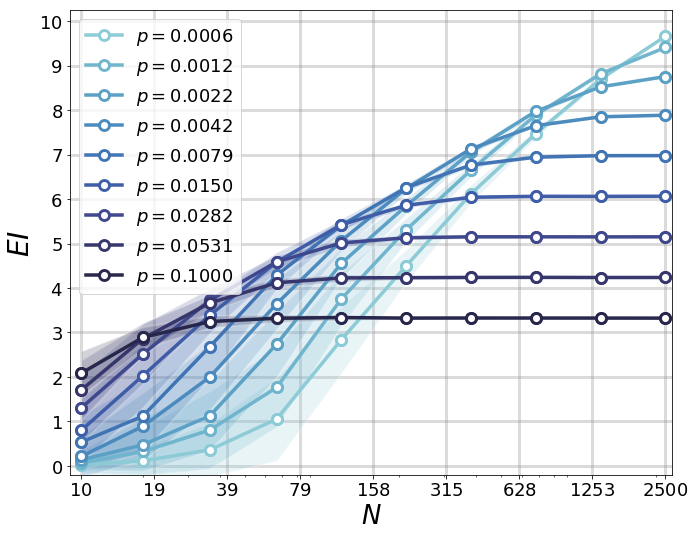

In [338]:
mult=0.9
plt.figure(figsize = (12*mult,9.5*mult))
m_shapes = dict(zip(ms,['o','^','s','+']))

# p_colors = cmo.cm.ice_r(np.linspace(0.2,0.85,len(ps)))
p_colors = cmo.cm.viridis(np.linspace(0.2,0.85,len(ps)))
p_colors = dict(zip(ps, p_colors))

maxEI=0
minEI=1
counter = 0
for p in ps:
    data = out_dictp[p]
    EI_N_list = np.mean(out_dictp[p],axis=1)
    if max(EI_N_list) > maxEI:
        maxEI = max(EI_N_list)
    if min(EI_N_list) < minEI:
        minEI = min(EI_N_list)
    m_temp_stdv = np.std(out_dictp[p],axis=1)
    fillb = EI_N_list-m_temp_stdv
    fillb[fillb<0] = 0
    
    sizes = np.array([(network_sizes[i]+network_sizes[i+1])/2 for i in range(0,len(network_sizes)-1,2)])
    means = np.array([(EI_N_list[i]+EI_N_list[i+1])/2 for i in range(0,len(EI_N_list)-1,2)])
    stdvs = np.array([(m_temp_stdv[i]+m_temp_stdv[i+1])/2 for i in range(0,len(m_temp_stdv)-1,2)])        
    sizes = np.array([size for size in sizes for i in range(2)])
    means = np.array([mean for mean in means for i in range(2)])
    stdvs = np.array([stdv for stdv in stdvs for i in range(2)])
    
    plt.fill_between(sizes, means-stdvs, means+stdvs, 
                     facecolor=p_colors[p], alpha=0.2, edgecolor='w', linewidth=2.0)
    plt.semilogx(sizes, means, alpha=0.99, marker=m_shapes[1], 
         markersize=10.0, color=p_colors[p], markerfacecolor='w', 
         markeredgewidth=2.9, linewidth=3.5, 
         label=r"$p = %.4f$"%(p))
    counter += 1
    
plt.xlabel(r"$N$", size=26)
plt.ylabel(r"$EI$", size=28)
xtix0 = np.logspace(np.log10(min(network_sizes)), np.log10((max(network_sizes))+1.2), 9)
xtix = np.logspace(np.log10(min(sizes)), np.log10((max(sizes))), 9)
ytix = np.linspace(0,10,11,dtype=int)
plt.xticks(xtix, ["$%i$"%i for i in np.array(xtix0,dtype=int)], size=18)
plt.yticks(ytix, ["$%i$"%i for i in np.round(ytix,2)], size=18)
plt.xlim(max(xtix)*0.00475, max(xtix)*1.065)
plt.ylim(-0.2, 10.25)
plt.grid(True, linestyle='-', linewidth=3.0, color='#999999', alpha=0.35)
plt.legend(fontsize=18)

if save:
    plt.savefig(where_to_save_pngs+"EI_compare_ER_ps.png", bbox_inches='tight', dpi=425)
    plt.savefig(where_to_save_pdfs+"EI_compare_ER_ps.pdf", bbox_inches='tight')

plt.show()

## End of Chapter 02. In [Chapter 03](https://nbviewer.jupyter.org/github/jkbren/einet/blob/master/code/Chapter%2003%20-%20Determinism%20and%20Degeneracy.ipynb) we'll see that $EI$ is determinism minus degeneracy
_______________

### References:
- __[Barabási, A.-L. & Albert, R. (1999). Emergence of scaling in random networks. Science, 286 (October), 509–512. doi: 10.1126/science.286.5439.509](http://barabasi.com/f/67.pdf)__
- __[Barabási, A.-L. (2016). Network Science. Cambridge University Press. doi: ISBN:9781107076266](http://networksciencebook.com/)__
- __[Del Genio, C. I., Gross, T., & Bassler, K. E. (2011). All scale-free networks are sparse. Physical Review Letters, 107(17), 1–4. doi: 10.1103/PhysRevLett.107.178701](https://physics.aps.org/featured-article-pdf/10.1103/PhysRevLett.107.178701)__
- __[Erdös, P., & Rènyi, A. (1959). On random graphs. Publicationes Mathematicae, 6, 290–297. doi: 10.2307/1999405](http://snap.stanford.edu/class/cs224w-readings/erdos59random.pdf)__